In [3]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
#  TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# tf.debugging.set_log_device_placement(True)

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model


2022-11-18 21:53:00.749479: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0
Num GPUs Available:  1


2022-11-18 21:53:02.426830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-18 21:53:02.433815: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-18 21:53:02.434033: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
train_images.shape

(60000, 28, 28)

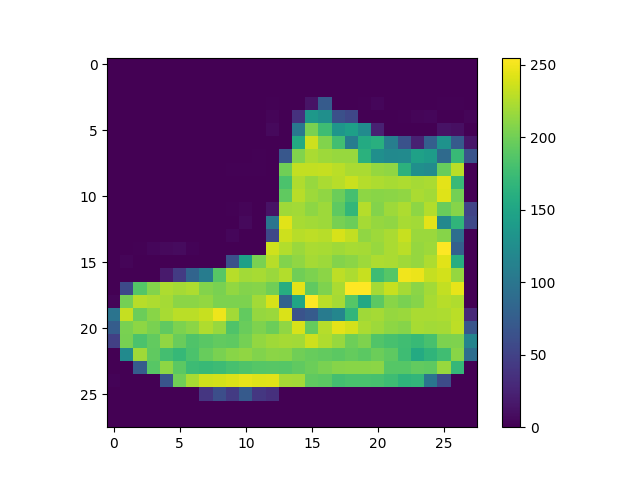

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

In [8]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

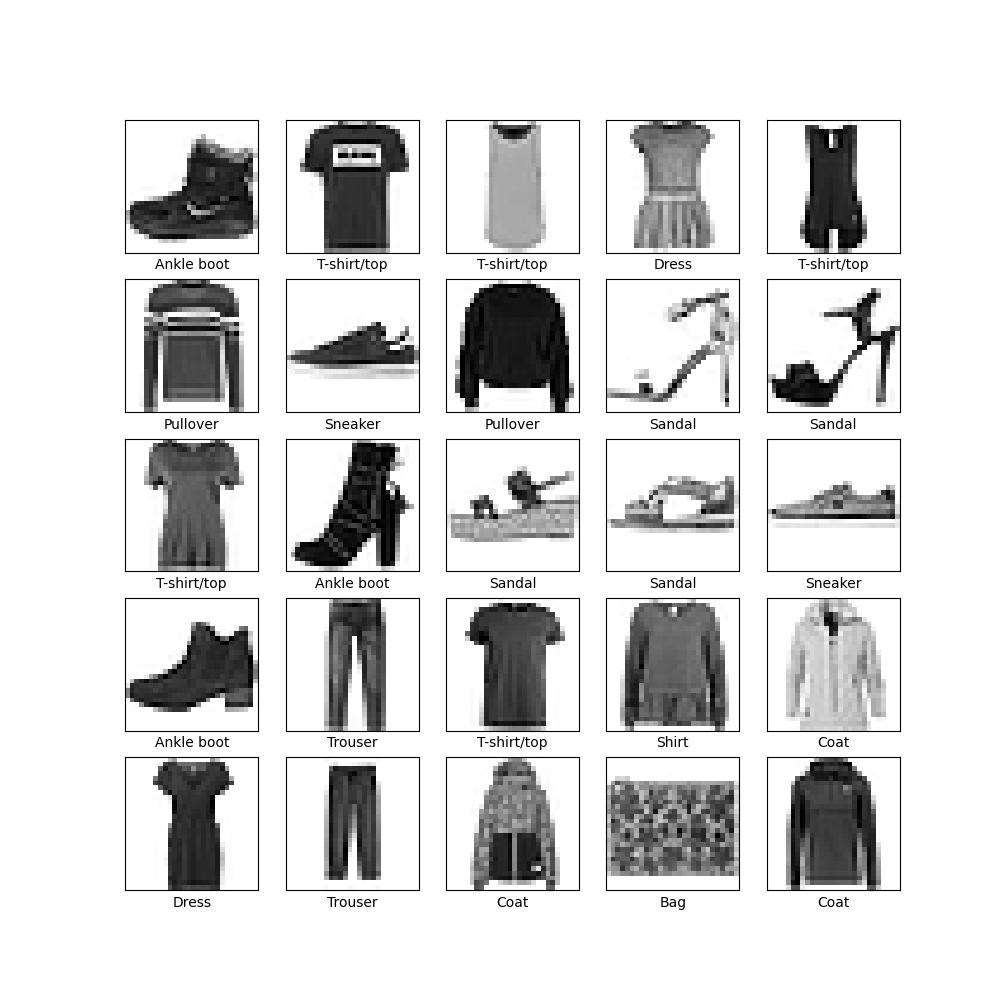

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Set up the layers

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2022-11-18 21:54:40.218796: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-18 21:54:40.221794: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-18 21:54:40.222058: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-18 21:54:40.222206: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have be

Compile the model, fit and train

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [12]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2022-11-18 21:55:19.928331: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-11-18 21:55:20.665825: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


  47/1875 [..............................] - ETA: 6s - loss: 1.1835 - accuracy: 0.6263     

2022-11-18 21:55:25.920571: I tensorflow/stream_executor/cuda/cuda_blas.cc:1633] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 9s 2ms/step - loss: 0.4996 - accuracy: 0.8236
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3739 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3383 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3128 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2975 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2849 - accuracy: 0.8934
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.8986
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2597 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2511 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2421 - accurac

In [13]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

2022-11-18 21:57:23.594037: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.
2022-11-18 21:57:23.737858: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 - 1s - loss: 0.3427 - accuracy: 0.8817 - 610ms/epoch - 2ms/step

Test accuracy: 0.8816999793052673


In [14]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [15]:
predictions = probability_model.predict(test_images)

109/313 [=========>....................] - ETA: 0s

2022-11-18 21:57:26.505776: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 958us/step


In [16]:
predictions[0]

array([2.7297256e-07, 1.6327202e-10, 4.3467616e-09, 1.1856120e-10,
       5.9799354e-10, 9.3268391e-05, 6.6014145e-08, 1.2862988e-02,
       2.1752949e-06, 9.8704123e-01], dtype=float32)

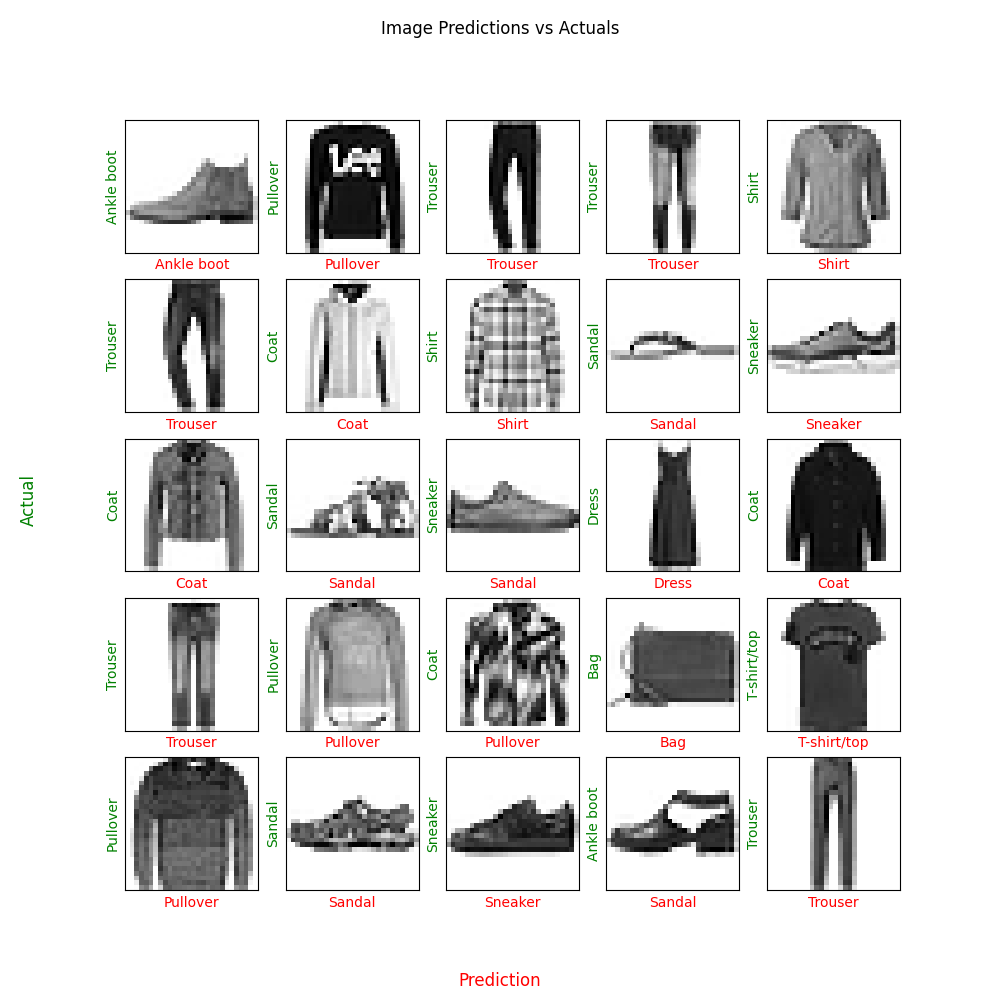

Prediction for image #0: Ankle boot
Actual for image #0: Ankle boot


In [41]:
fig = plt.figure(figsize=(10,10))
font1 = {'color':'black'}
font2 = {'color':'red'}
font3 = {'color':'green'}
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(predictions[i])], fontdict = font2)
    plt.ylabel(class_names[test_labels[i]], fontdict = font3)
plt.suptitle('Image Predictions vs Actuals', fontdict = font1)
fig.supxlabel('Prediction', fontdict = font2)
fig.supylabel('Actual', fontdict = font3)
plt.show()
print("Prediction for image #0: " + class_names[np.argmax(predictions[0])])
print("Actual for image #0: " + class_names[test_labels[0]])